In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('lse_stocks_comprehensive_data_full.csv')
#df = pd.read_csv('lse_stocks_comprehensive_data.csv')



In [136]:
# Print columns that start with 'balance_sheet'
balance_sheet_columns = [col for col in df.columns if col.startswith('cashflow')]
print(balance_sheet_columns)


['cashflow:Free Cash Flow', 'cashflow:Repayment Of Debt', 'cashflow:Issuance Of Debt', 'cashflow:Issuance Of Capital Stock', 'cashflow:Capital Expenditure', 'cashflow:End Cash Position', 'cashflow:Beginning Cash Position', 'cashflow:Effect Of Exchange Rate Changes', 'cashflow:Changes In Cash', 'cashflow:Financing Cash Flow', 'cashflow:Net Other Financing Charges', 'cashflow:Cash Dividends Paid', 'cashflow:Common Stock Dividend Paid', 'cashflow:Net Common Stock Issuance', 'cashflow:Common Stock Issuance', 'cashflow:Net Issuance Payments Of Debt', 'cashflow:Net Short Term Debt Issuance', 'cashflow:Net Long Term Debt Issuance', 'cashflow:Long Term Debt Payments', 'cashflow:Long Term Debt Issuance', 'cashflow:Investing Cash Flow', 'cashflow:Net Other Investing Changes', 'cashflow:Interest Received Cfi', 'cashflow:Net Investment Purchase And Sale', 'cashflow:Sale Of Investment', 'cashflow:Purchase Of Investment', 'cashflow:Net Business Purchase And Sale', 'cashflow:Sale Of Business', 'cashf

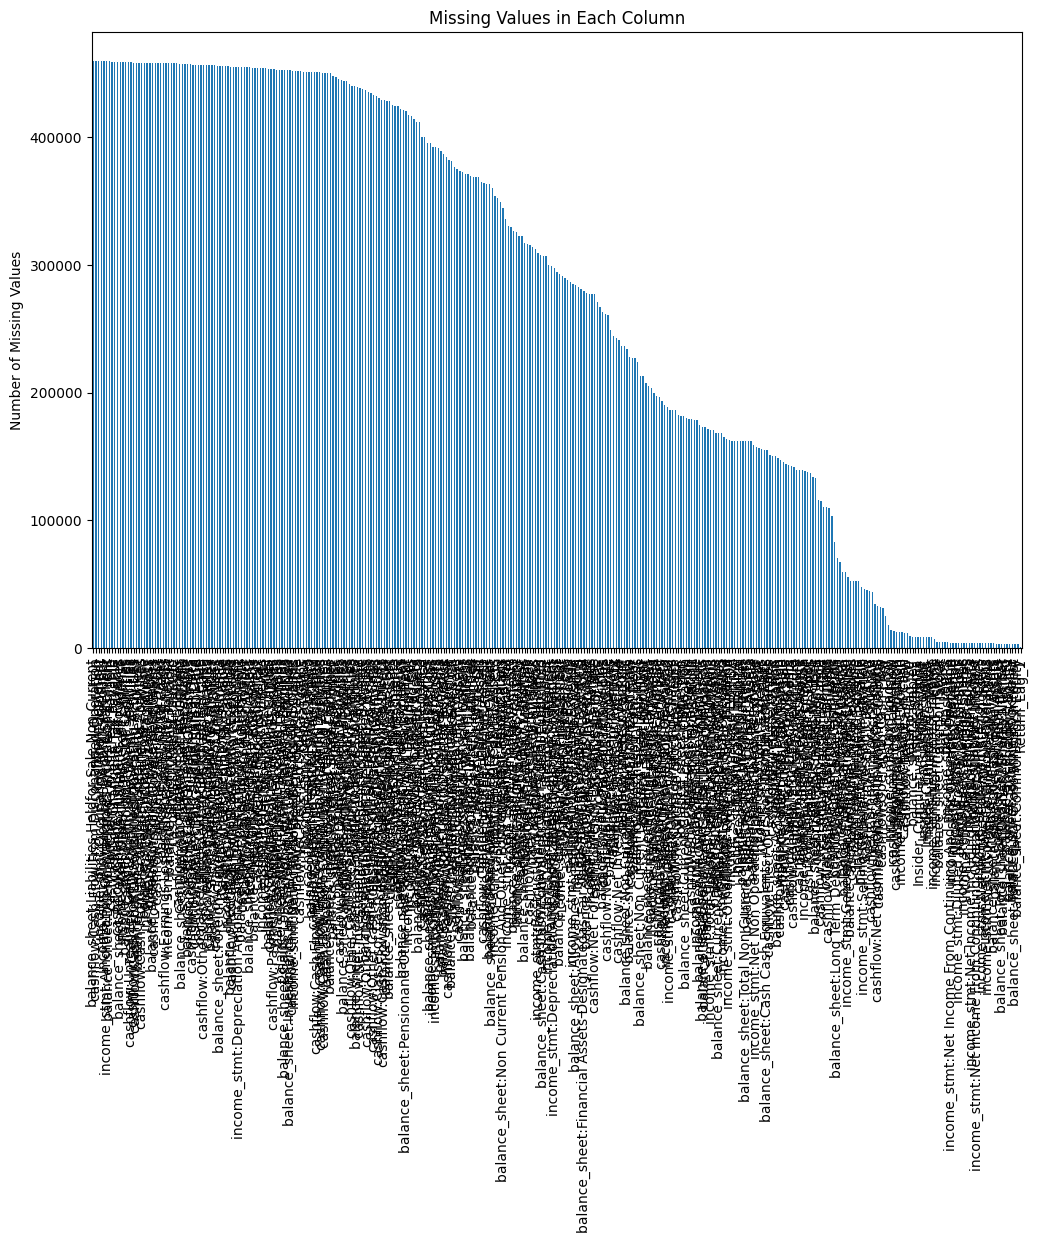

(459464, 354)


In [137]:
# Visualize missing data
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

plt.figure(figsize=(12, 8))
missing_values.sort_values(ascending=False).plot.bar()
plt.title('Missing Values in Each Column')
plt.ylabel('Number of Missing Values')
plt.show()

print(df.shape)

In [138]:
df[['Close', 'Volume']] = df[['Close', 'Volume']].ffill()


In [139]:

    from sklearn.impute import SimpleImputer

    num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    #imputer = SimpleImputer(strategy='median')
    #df[num_cols] = imputer.fit_transform(df[num_cols])


In [140]:
df['EPS'] = df['income_stmt:Net Income'] / df['balance_sheet:Share Issued']
df['PE_Ratio'] = df['Close'] / df['EPS']

In [141]:
df['Market_Cap'] = df['Close'] * df['balance_sheet:Share Issued']
df['Enterprise_Value'] = df['Market_Cap'] + df['balance_sheet:Total Debt'] - df['balance_sheet:Cash And Cash Equivalents']
df['EV_EBITDA'] = df['Enterprise_Value'] / df['income_stmt:EBITDA']


In [142]:
df['Book_Value_Per_Share'] = df['balance_sheet:Common Stock Equity'] / df['balance_sheet:Share Issued']
df['PB_Ratio'] = df['Close'] / df['Book_Value_Per_Share']


In [143]:
df['Debt_Equity_Ratio'] = df['balance_sheet:Total Debt'] / df['balance_sheet:Common Stock Equity']


In [144]:
df['Current_Ratio'] = df['balance_sheet:Current Assets'] / df['balance_sheet:Current Liabilities']


In [145]:
df['Quick_Ratio'] = (df['balance_sheet:Current Assets'] - df['balance_sheet:Inventory']) / df['balance_sheet:Current Liabilities']


In [146]:
df['ROE'] = df['income_stmt:Net Income'] / df['balance_sheet:Common Stock Equity']
df['ROA'] = df['income_stmt:Net Income'] / df['balance_sheet:Total Assets']
df['Gross_Margin'] = df['income_stmt:Gross Profit'] / df['income_stmt:Total Revenue']
df['Operating_Margin'] = df['income_stmt:Operating Income'] / df['income_stmt:Total Revenue']
df['Net_Profit_Margin'] = df['income_stmt:Net Income'] / df['income_stmt:Total Revenue']
df['Dividend_Yield'] = df['Dividends'] / df['Close']
df['Payout_Ratio'] = df['Dividends'] / df['income_stmt:Net Income']



In [147]:
if False:    
    df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA_12'] - df['EMA_26']
    df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()


In [148]:
 if False:  
    df['20_SMA'] = df['Close'].rolling(window=20).mean()
    df['20_STD'] = df['Close'].rolling(window=20).std()
    df['Upper_Band'] = df['20_SMA'] + (df['20_STD'] * 2)
    df['Lower_Band'] = df['20_SMA'] - (df['20_STD'] * 2)


In [149]:
if False:
    df['Daily_Return'] = df['Close'].pct_change()
    df['Direction'] = np.where(df['Daily_Return'] >= 0, 1, -1)
    df['OBV_Volume'] = df['Volume'] * df['Direction']
    df['OBV'] = df['OBV_Volume'].cumsum()


In [150]:
if False:
    df['14_High'] = df['High'].rolling(window=14).max()
    df['14_Low'] = df['Low'].rolling(window=14).min()
    df['%K'] = 100 * ((df['Close'] - df['14_Low']) / (df['14_High'] - df['14_Low']))
    df['%D'] = df['%K'].rolling(window=3).mean()


In [151]:
if False:
    df['H-L'] = df['High'] - df['Low']
    df['H-C'] = abs(df['High'] - df['Close'].shift())
    df['L-C'] = abs(df['Low'] - df['Close'].shift())
    df['TR'] = df[['H-L', 'H-C', 'L-C']].max(axis=1)
    df['ATR'] = df['TR'].rolling(window=14).mean()


In [152]:
#df = pd.get_dummies(df, columns=['Ticker'], prefix='Ticker')
#df = df.drop(columns='Ticker')

In [153]:
if False:
    lags = [1, 2, 3, 5, 10, 20]
    for lag in lags:
        df[f'Close_Lag_{lag}'] = df['Close'].shift(lag)
        df[f'Return_Lag_{lag}'] = df['Close'].pct_change(lag)


In [154]:
if False:
    financial_ratios = ['PE_Ratio', 'Debt_Equity_Ratio', 'ROE']
    for ratio in financial_ratios:
        for lag in lags:
            df[f'{ratio}_Lag_{lag}'] = df[ratio].shift(lag)


In [155]:
from scipy import stats

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df[num_cols]))

# Set a threshold (commonly 3)
threshold = 3
print(df[(z_scores > threshold).all(axis=1)])


Empty DataFrame
Columns: [index, Date, Open, High, Low, Close, Volume, Dividends, Stock Splits, income_stmt:Tax Effect Of Unusual Items, income_stmt:Tax Rate For Calcs, income_stmt:Normalized EBITDA, income_stmt:Total Unusual Items, income_stmt:Total Unusual Items Excluding Goodwill, income_stmt:Net Income From Continuing Operation Net Minority Interest, income_stmt:Reconciled Depreciation, income_stmt:Reconciled Cost Of Revenue, income_stmt:EBITDA, income_stmt:EBIT, income_stmt:Net Interest Income, income_stmt:Interest Expense, income_stmt:Interest Income, income_stmt:Normalized Income, income_stmt:Net Income From Continuing And Discontinued Operation, income_stmt:Total Expenses, income_stmt:Rent Expense Supplemental, income_stmt:Total Operating Income As Reported, income_stmt:Diluted Average Shares, income_stmt:Basic Average Shares, income_stmt:Diluted EPS, income_stmt:Basic EPS, income_stmt:Diluted NI Availto Com Stockholders, income_stmt:Net Income Common Stockholders, income_stmt:

In [156]:
import pandas as pd
import numpy as np

# Assuming df and num_cols are already defined

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean DataFrame to identify outliers
outliers = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound))

# Get columns with outliers
columns_with_outliers = outliers.any().index[outliers.any()].tolist()

# Display columns with outliers
if columns_with_outliers:
    print("Columns containing outliers:")
    for col in columns_with_outliers:
        print(f"- {col}")
else:
    print("No outliers detected in any column.")

# Optionally, you can also display the number of outliers in each column
print("\nNumber of outliers in each column:")
for col in columns_with_outliers:
    num_outliers = outliers[col].sum()
    print(f"- {col}: {num_outliers} outliers")


Columns containing outliers:
- Open
- High
- Low
- Close
- Volume
- Dividends
- Stock Splits
- income_stmt:Tax Effect Of Unusual Items
- income_stmt:Normalized EBITDA
- income_stmt:Total Unusual Items
- income_stmt:Total Unusual Items Excluding Goodwill
- income_stmt:Net Income From Continuing Operation Net Minority Interest
- income_stmt:Reconciled Depreciation
- income_stmt:Reconciled Cost Of Revenue
- income_stmt:EBITDA
- income_stmt:EBIT
- income_stmt:Net Interest Income
- income_stmt:Interest Expense
- income_stmt:Interest Income
- income_stmt:Normalized Income
- income_stmt:Net Income From Continuing And Discontinued Operation
- income_stmt:Total Expenses
- income_stmt:Rent Expense Supplemental
- income_stmt:Total Operating Income As Reported
- income_stmt:Diluted Average Shares
- income_stmt:Basic Average Shares
- income_stmt:Diluted EPS
- income_stmt:Basic EPS
- income_stmt:Diluted NI Availto Com Stockholders
- income_stmt:Net Income Common Stockholders
- income_stmt:Otherunder

In [157]:
df['Rolling_STD_20'] = df['Close'].rolling(window=20).std()
df['Rolling_STD_50'] = df['Close'].rolling(window=50).std()


In [158]:
df['Momentum_10'] = df['Close'] - df['Close'].shift(10)


In [159]:
df['Net_Insider_Transactions'] = df['Insider_Shares'] - df['Insider_Shares'].shift(1)


In [160]:
# Sort by date to maintain temporal order
df = df.sort_values(by='Date')

# Define split sizes
train_size = int(len(df) * 0.7)
val_size = int(len(df) * 0.15)
test_size = len(df) - train_size - val_size

# Split the data
train = df[:train_size]
validation = df[train_size:train_size+val_size]
test = df[train_size+val_size:]


In [161]:
import pandas as pd
import numpy as np

# Ensure 'Date' column is in datetime format and sort the DataFrame
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date').reset_index(drop=True)

def safe_divide(numerator, denominator):
    if isinstance(numerator, (int, float)) and isinstance(denominator, (int, float)):
        return np.nan if denominator == 0 else numerator / denominator
    else:
        return pd.Series(numerator).divide(denominator).replace([np.inf, -np.inf], np.nan)


# 1. **Income Statement Ratios**

# Gross Margin: Gross Profit / Total Revenue
df['Gross_Margin'] = safe_divide(df['income_stmt:Gross Profit'], df['income_stmt:Total Revenue'])

# Operating Margin: Operating Income / Total Revenue
df['Operating_Margin'] = safe_divide(df['income_stmt:Operating Income'], df['income_stmt:Total Revenue'])

# Net Profit Margin: Net Income / Total Revenue
df['Net_Profit_Margin'] = safe_divide(df['income_stmt:Net Income'], df['income_stmt:Total Revenue'])

# EBITDA Margin: EBITDA / Total Revenue
df['EBITDA_Margin'] = safe_divide(df['income_stmt:EBITDA'], df['income_stmt:Total Revenue'])

# Effective Tax Rate: Tax Provision / Pretax Income
df['Effective_Tax_Rate'] = safe_divide(df['income_stmt:Tax Provision'], df['income_stmt:Pretax Income'])

# Interest Coverage Ratio: EBIT / Interest Expense
df['Interest_Coverage_Ratio'] = safe_divide(df['income_stmt:EBIT'], df['income_stmt:Interest Expense'])

# Revenue Growth Rate: Percentage change in Total Revenue over time
#df['Revenue_Growth_Rate'] = df['income_stmt:Total Revenue'].pct_change()
def calculate_revenue_growth_rate(series):
    pct_change = series.pct_change()
    last_valid_change = np.nan
    
    result = []
    for i, change in enumerate(pct_change):
        if i == 0 or pd.isna(change):
            result.append(np.nan)
        elif change == 0 and not pd.isna(last_valid_change):
            result.append(last_valid_change)
        else:
            last_valid_change = change
            result.append(change)
    
    return pd.Series(result)

df['Revenue_Growth_Rate'] = calculate_revenue_growth_rate(df['income_stmt:Total Revenue'])
# 2. **Cash Flow-Based Metrics**

# Cash Conversion Ratio: Operating Cash Flow / Net Income
df['Cash_Conversion_Ratio'] = safe_divide(df['cashflow:Operating Cash Flow'], df['income_stmt:Net Income'])

# CapEx to Sales Ratio: Capital Expenditures / Total Revenue
df['CapEx_to_Sales_Ratio'] = safe_divide(df['cashflow:Capital Expenditure'], df['income_stmt:Total Revenue'])

# Free Cash Flow per Share: Free Cash Flow / Diluted Average Shares
df['Free_Cash_Flow_per_Share'] = safe_divide(df['cashflow:Free Cash Flow'], df['income_stmt:Diluted Average Shares'])
if False:
    # FCF Yield: Free Cash Flow per Share / Close Price
    df['FCF_Yield'] = safe_divide(df['Free_Cash_Flow_per_Share'], df['Close'])

# Operating Cash Flow per Share: Operating Cash Flow / Diluted Average Shares
df['Operating_Cash_Flow_per_Share'] = safe_divide(df['cashflow:Operating Cash Flow'], df['income_stmt:Diluted Average Shares'])

# 3. **Balance Sheet Ratios**

# Debt-to-Equity Ratio: Total Debt / Stockholders' Equity
df['Debt_to_Equity_Ratio_Calculated'] = safe_divide(df['balance_sheet:Total Debt'], df['balance_sheet:Stockholders Equity'])

# Current Ratio: Current Assets / Current Liabilities
df['Current_Ratio_Calculated'] = safe_divide(df['balance_sheet:Current Assets'], df['balance_sheet:Current Liabilities'])

# Quick Ratio: (Current Assets - Inventory) / Current Liabilities
df['Quick_Ratio_Calculated'] = safe_divide(
    df['balance_sheet:Current Assets'] - df['balance_sheet:Inventory'],
    df['balance_sheet:Current Liabilities']
)

# Return on Assets (ROA): Net Income / Total Assets
df['ROA_Calculated'] = safe_divide(df['income_stmt:Net Income'], df['balance_sheet:Total Assets'])

# Return on Equity (ROE): Net Income / Stockholders' Equity
df['ROE_Calculated'] = safe_divide(df['income_stmt:Net Income'], df['balance_sheet:Stockholders Equity'])

# Book Value per Share: Stockholders' Equity / Diluted Average Shares
df['Book_Value_per_Share_Calculated'] = safe_divide(df['balance_sheet:Stockholders Equity'], df['income_stmt:Diluted Average Shares'])

# 4. **Combine Related Expense Items to Create More Meaningful Features**

# Operating Expenses: Sum of Selling & Marketing Expense and General & Administrative Expense
df['Operating_Expenses'] = df[['income_stmt:Selling And Marketing Expense', 'income_stmt:General And Administrative Expense']].sum(axis=1)



# Total Operating Expenses: Sum of all major operating expenses
df['Total_Operating_Expenses'] = df[['Operating_Expenses', 'income_stmt:Research And Development', 'income_stmt:Other Operating Expenses', 'income_stmt:Depreciation And Amortization In Income Statement']].sum(axis=1)



# 6. **Net Debt**

# Net Debt: Total Debt - Cash and Cash Equivalents
df['Net_Debt_Calculated'] = df['balance_sheet:Total Debt'] - df['balance_sheet:Cash And Cash Equivalents']

# 7. **Working Capital**

# Working Capital: Current Assets - Current Liabilities
df['Working_Capital_Calculated'] = df['balance_sheet:Current Assets'] - df['balance_sheet:Current Liabilities']

# 8. **Financial Ratios Based on Market Data**
if False:
    # FCF Yield using Market Cap
    df['FCF_Yield_Market_Cap'] = safe_divide(df['cashflow:Free Cash Flow'], df['Market_Cap'])

    # Earnings Yield: Inverse of PE Ratio
    df['Earnings_Yield'] = safe_divide(1, df['PE_Ratio'])

# 9. **Time-Series Features**
if False:
    # Lagged Returns
    df['Return_Lag_1'] = df['Close'].pct_change(1)
    df['Return_Lag_5'] = df['Close'].pct_change(5)
    df['Return_Lag_10'] = df['Close'].pct_change(10)
    df['Return_Lag_20'] = df['Close'].pct_change(20)
    print('test')
    # Rolling Volatility (Standard Deviation)
    df['Rolling_STD_20'] = df['Close'].rolling(window=20).std()
    df['Rolling_STD_50'] = df['Close'].rolling(window=50).std()

    # Momentum Indicators
    df['Momentum_10'] = df['Close'] - df['Close'].shift(10)

# 10. **Insider Trading Metrics**

# Net Insider Transactions: Insider Purchases - Insider Sales
df['Net_Insider_Transactions'] = df['Insider_Shares']  # Assuming positive for purchases and negative for sales

# 11. **Feature Reduction (Correlation Analysis)**
if False:
    # Compute correlation matrix
    corr_matrix = df.corr(numeric_only=True).abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Find features with high correlation (threshold can be adjusted)
    high_corr_var = [column for column in upper.columns if any(upper[column] > 0.95)]

    # Drop highly correlated features (ensure critical features are not dropped)
    df_reduced = df.drop(columns=high_corr_var)

# 12. **Handle Missing Values**

# Fill missing values with median or mean as appropriate
#df_reduced.fillna(df_reduced.median(), inplace=True)

# Alternatively, drop rows with missing target variable
#df_reduced.dropna(subset=['Target'], inplace=True)




C:\Users\User\AppData\Local\Temp\ipykernel_15528\794822605.py:38: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  pct_change = series.pct_change()


In [162]:
df['Altman_Z_Score'] = (
    1.2 * (df['Working_Capital_Calculated'] / df['balance_sheet:Total Assets']) +
    1.4 * (df['balance_sheet:Retained Earnings'] / df['balance_sheet:Total Assets']) +
    3.3 * (df['income_stmt:EBIT'] / df['balance_sheet:Total Assets']) +
    0.6 * (df['balance_sheet:Common Stock Equity'] / df['balance_sheet:Total Liabilities Net Minority Interest']) +
    1.0 * (df['income_stmt:Total Revenue'] / df['balance_sheet:Total Assets'])
)


if True:

    # Ensure the DataFrame is sorted
    df.sort_values(['Ticker', 'Date'], inplace=True)

    # F_ROA: Net Income > 0
    df['F_ROA'] = (df['income_stmt:Net Income'] > 0).astype(int)

    # F_CFO: Operating Cash Flow > 0
    df['F_CFO'] = (df['cashflow:Operating Cash Flow'] > 0).astype(int)

    # F_Accrual: Operating Cash Flow > Net Income
    df['F_Accrual'] = (df['cashflow:Operating Cash Flow'] > df['income_stmt:Net Income']).astype(int)

    # F_Leverage: Decrease in Long-Term Debt
    df['F_Leverage'] = df.groupby('Ticker')['balance_sheet:Long Term Debt'].diff(-1).fillna(0).apply(lambda x: int(x <= 0))

    # F_Liquidity: Increase in Current Ratio
    df['F_Liquidity'] = df.groupby('Ticker')['Current_Ratio_Calculated'].diff().fillna(0).apply(lambda x: int(x > 0))

    # F_Equity: No new shares issued (Shares Outstanding)
    df['F_Equity'] = df.groupby('Ticker')['balance_sheet:Ordinary Shares Number'].diff().fillna(0).apply(lambda x: int(x <= 0))

    # F_Margin: Increase in Gross Margin
    df['F_Margin'] = df.groupby('Ticker')['Gross_Margin'].diff().fillna(0).apply(lambda x: int(x > 0))
if True:
    # Calculate Asset Turnover Ratio
    df['Asset_Turnover_Ratio'] = df['income_stmt:Total Revenue'] / df['balance_sheet:Total Assets']

    # F_Turnover: Increase in Asset Turnover Ratio
    df['F_Turnover'] = df.groupby('Ticker')['Asset_Turnover_Ratio'].diff().fillna(0).apply(lambda x: int(x > 0))

    # Sum up the F-Score
    df['Piotroski_F_Score'] = df[['F_ROA', 'F_CFO', 'F_Accrual', 'F_Leverage', 'F_Liquidity',
                                'F_Equity', 'F_Margin', 'F_Turnover']].sum(axis=1)
    df['Retention_Ratio'] = 1 - df['Payout_Ratio']
    # Ensure the DataFrame is sorted
    df.sort_values(['Ticker', 'Date'], inplace=True)

    # Revenue YoY Growth
    df['Revenue_YoY_Growth'] = df.groupby('Ticker')['income_stmt:Total Revenue'].pct_change(periods=4)

    # Net Income YoY Growth
    df['Net_Income_YoY_Growth'] = df.groupby('Ticker')['income_stmt:Net Income'].pct_change(periods=4)
if False:
    # Sort the DataFrame
    df.sort_values(['Ticker', 'Date'], inplace=True)

    # Create a MultiIndex
    df.set_index(['Ticker', 'Date'], inplace=True)

    # Compute moving averages
    df['Insider_MA5'] = df.groupby(level=0)['Net_Insider_Transactions'].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)
    df['Insider_MA20'] = df.groupby(level=0)['Net_Insider_Transactions'].rolling(window=20, min_periods=1).mean().reset_index(level=0, drop=True)

    # Reset the index if you need 'Ticker' and 'Date' as columns
    df.reset_index(inplace=True)

    # Identify crossovers
    df['Insider_MA_Crossover'] = df['Insider_MA5'] - df['Insider_MA20']

    df['Net_Insider_Transactions_Z'] = df.groupby('Ticker')['Net_Insider_Transactions']\
        .transform(lambda x: (x - x.mean()) / x.std())





    

C:\Users\User\AppData\Local\Temp\ipykernel_15528\429351911.py:50: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Revenue_YoY_Growth'] = df.groupby('Ticker')['income_stmt:Total Revenue'].pct_change(periods=4)
C:\Users\User\AppData\Local\Temp\ipykernel_15528\429351911.py:53: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Net_Income_YoY_Growth'] = df.groupby('Ticker')['income_stmt:Net Income'].pct_change(periods=4)


In [163]:
import seaborn as sns
# Assuming your dataframe is named 'df'
target_columns = ['Open', 'High', 'Low', 'Close']
columns_to_drop = [
    'Close_Lag_1',
    'SMA_50',
    '14_Low',
    'Close_Lag_2',
    'EMA_12',
    'Close_Lag_3',
    'SMA_200',
    'Close_Lag_5',
    'EMA_26',
    '20_SMA',
    'Lower_Band',
    'Close_Lag_20',
    'Close_Lag_10',
    'Upper_Band' ,
    '14_High',
    'RSI',
    'Target',
    'Insider_Value',
    'Insider_Cumulative_Value',
    'Momentum_10'
    
]
df_no_price = df.copy()

for column in columns_to_drop:
    if column in df_no_price.columns:
        df_no_price = df_no_price.drop(columns=column)
# Calculate correlation matrix


# Create a list of features, excluding price-related columns
price_related_columns = ['Open', 'High', 'Low', 'Close',]
features = [col for col in df_no_price.columns if col not in price_related_columns]
if False:
    correlation_matrix = df_no_price.corr()
    # Calculate correlations for each target column
    for target in target_columns:
        print(f"\nTop correlations for {target}:")
        correlations = correlation_matrix[target].abs().sort_values(ascending=False)
        top_correlations = correlations[correlations.index.isin(features)].head(20)
        print(top_correlations)

        # Visualize top correlations
        plt.figure(figsize=(10, 6))
        sns.barplot(x=top_correlations.index, y=top_correlations.values)
        plt.title(f"Top 10 Correlations for {target}")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

In [164]:
import random
columns_of_interest = [
    'balance_sheet:Preferred Shares Number',
    'income_stmt:Depreciation And Amortization In Income Statement',
    'balance_sheet:Investments And Advances',
    'income_stmt:Amortization',
    'balance_sheet:Non Current Deferred Revenue', 
    'Open'
]

print(df[columns_of_interest].head(10))

      balance_sheet:Preferred Shares Number  \
496                                     NaN   
1282                                    NaN   
1941                                    NaN   
3114                                    NaN   
3811                                    NaN   
5212                                    NaN   
5833                                    NaN   
6744                                    NaN   
7668                                    NaN   
8800                                    NaN   

      income_stmt:Depreciation And Amortization In Income Statement  \
496                                                 NaN               
1282                                                NaN               
1941                                                NaN               
3114                                                NaN               
3811                                                NaN               
5212                                                NaN 

In [165]:
#print(df[['Date','Ticker_AZN']].tail(10))

In [166]:
# Calculate the number of null values in each column
null_counts = df.isnull().sum()

# Sort the columns by null count in descending order
null_counts_sorted = null_counts.sort_values(ascending=False)

# Display the top 20 columns with the most null values
print("Top 20 columns with the most null values:")
print(null_counts_sorted.head(20))

# Calculate the percentage of null values
total_rows = len(df)
null_percentages = (null_counts_sorted / total_rows) * 100

# Display the top 20 columns with the highest percentage of null values
print("\nTop 20 columns with the highest percentage of null values:")
print(null_percentages.head(20))

Top 20 columns with the most null values:
cashflow:Depletion                                          459464
income_stmt:Amortization Of Intangibles Income Statement    459464
income_stmt:Occupancy And Equipment                         459464
balance_sheet:Liabilities Heldfor Sale Non Current          459464
balance_sheet:Duefrom Related Parties Non Current           459464
cashflow:Cash Flow From Discontinued Operation              459464
income_stmt:Provision For Doubtful Accounts                 459464
cashflow:Change In Tax Payable                              458961
cashflow:Change In Interest Payable                         458961
cashflow:Change In Income Tax Payable                       458961
balance_sheet:Minimum Pension Liabilities                   458960
income_stmt:Other Non Interest Expense                      458960
cashflow:Amortization Of Securities                         458960
balance_sheet:Receivables Adjustments Allowances            458960
cashflow:Unrealized 

In [167]:
print(df['Altman_Z_Score'].head())

496    NaN
1282   NaN
1941   NaN
3114   NaN
3811   NaN
Name: Altman_Z_Score, dtype: float64


In [168]:
if False:
    print(df['F_Liquidity'].describe())

    # For Current Ratio
    print(df['Current_Ratio_Calculated'].describe())
    print(df.columns.values)
    print(df[['Date','Altman_Z_Score','balance_sheet:Current Assets','balance_sheet:Current Liabilities']].sample(10))

In [169]:
try:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df_no_price['Date'] = pd.to_datetime(df_no_price['Date'])
    df_no_price.set_index('Date', inplace=True)
except:
    print('error')
X = df_no_price.copy()
price = ['Open', 'High', 'Low', 'Close','index','Volume','Daily_Return','Ticker','PE_Ratio','Market_Cap','Enterprise_Value','EV_EBITDA','PB_Ratio','Dividend_Yield','Rolling_STD_20','Rolling_STD_50','Return_Lag_1','Return_Lag_5','Return_Lag_10','Return_Lag_20','Insider_Cumulative_Transactions','Insider_Cumulative_Shares']
for column in price:
    if column in X.columns:
        X = X.drop(columns=column)



# Create the target variables DataFrame (if you want to predict multiple prices simultaneously)
y = df[price_related_columns]


In [170]:
from datetime import datetime, timedelta

# Assuming your data is in a DataFrame called 'df' with a datetime index
# If not, you'll need to set the index to a datetime column first

# Get the date range
end_date = pd.Timestamp.now().floor('D')
start_date = end_date - pd.Timedelta(days=730)  # 2 years ago

# Calculate the split date (25% of the data for testing)
split_date = end_date - pd.Timedelta(days=183)  # Approximately 6 months


# Split the data
X_train = X[X.index < split_date]
X_test = X[X.index >= split_date]

# Assuming 'y' is a Series with the same index as 'df'
y_train = y[y.index < split_date]
y_test = y[y.index >= split_date]

# Print some information about the split
print(f"Training data: from {X_train.index.min()} to {X_train.index.max()}")
print(f"Testing data: from {X_test.index.min()} to {X_test.index.max()}")
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")


Training data: from 2022-09-20 00:00:00 to 2024-03-22 00:00:00
Testing data: from 2024-03-25 00:00:00 to 2024-09-17 00:00:00
Training set size: 348049
Testing set size: 111415


In [171]:
X_train = X_train.replace([np.inf, -np.inf], np.nan)

# Replace infinite values with NaN in y_train
# Assuming y_train is a Series, if it's a DataFrame, you can use the same method as X_train
y_train = y_train.replace([np.inf, -np.inf], np.nan)

In [172]:
import xgboost as xgb

# Initialize the XGBoost regressor
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [173]:
XGB_FLOAT_MAX = 3.4028235e38

def check_data(X, y, name):
    # Convert to numpy arrays if they're pandas objects
    X_np = X.values if isinstance(X, (pd.DataFrame, pd.Series)) else X
    y_np = y.values if isinstance(y, (pd.DataFrame, pd.Series)) else y

    inf_mask_X = np.isinf(X_np)
    inf_mask_y = np.isinf(y_np)
    large_mask_X = np.abs(X_np) > XGB_FLOAT_MAX
    large_mask_y = np.abs(y_np) > XGB_FLOAT_MAX
    
    inf_columns = np.where(np.any(inf_mask_X, axis=0))[0]
    large_columns = np.where(np.any(large_mask_X, axis=0))[0]
    
    if inf_columns.size > 0:
        print(f"Columns in {name}_X with inf values:", inf_columns)
    if large_columns.size > 0:
        print(f"Columns in {name}_X with values exceeding limit:", large_columns)
    
    if np.sum(inf_mask_y) > 0:
        print(f"Infinity values in {name}_y:", np.sum(inf_mask_y))
    if np.sum(large_mask_y) > 0:
        print(f"Values exceeding XGBoost limit in {name}_y:", np.sum(large_mask_y))

# Check training data
check_data(X_train, y_train, "train")

In [174]:
print(X_train.columns[[337, 340, 350]])

Index(['Current_Ratio', 'ROA', 'Cash_Conversion_Ratio'], dtype='object')


In [175]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 123990.33691553926
R-squared Score: 0.9403557876468371


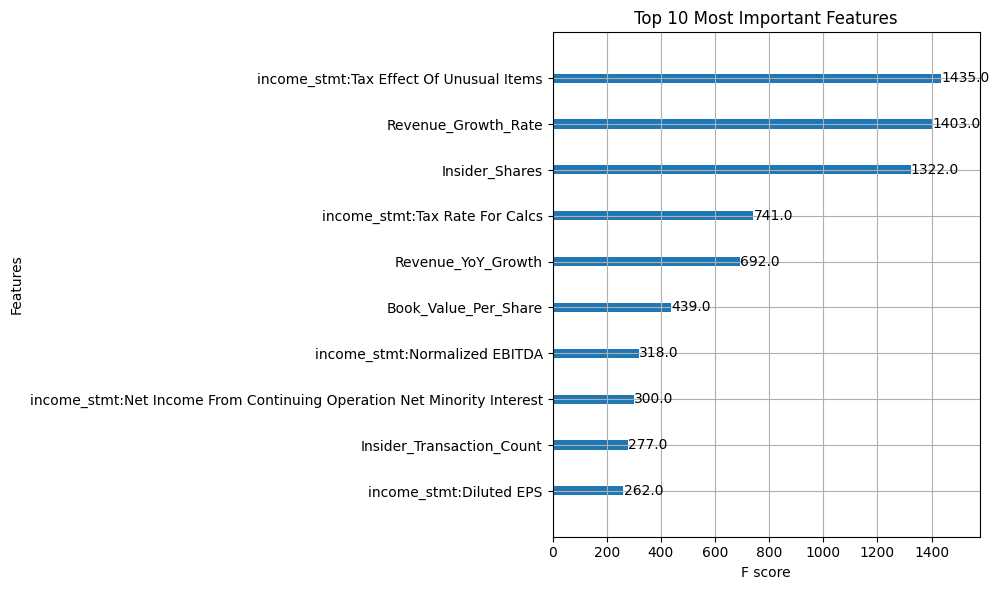

In [176]:
from xgboost import plot_importance
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 6))
plot_importance(model, ax=ax, max_num_features=10)
plt.title("Top 10 Most Important Features")
plt.tight_layout()
plt.show()

In [177]:
importance_scores = model.feature_importances_

# Get feature names
feature_names = model.feature_names_in_

# Create a list of tuples (feature name, importance score)
feature_importance = list(zip(feature_names, importance_scores))

# Sort features by importance
sorted_features = sorted(feature_importance, key=lambda x: x[1], reverse=True)

# Print top 10 factors
print("Top 10 Most Important Factors:")
for i, (feature, score) in enumerate(sorted_features[:10], 1):
    print(f"{i}. {feature}: {score:.4f}")

Top 10 Most Important Factors:
1. income_stmt:Basic EPS: 0.2455
2. balance_sheet:Pensionand Other Post Retirement Benefit Plans Current: 0.1188
3. cashflow:Capital Expenditure Reported: 0.0420
4. balance_sheet:Properties: 0.0362
5. balance_sheet:Other Current Assets: 0.0331
6. balance_sheet:Current Debt And Capital Lease Obligation: 0.0301
7. balance_sheet:Total Liabilities Net Minority Interest: 0.0292
8. EPS: 0.0213
9. Operating_Cash_Flow_per_Share: 0.0192
10. cashflow:Net Intangibles Purchase And Sale: 0.0167


KeyError: 'level_0'

In [180]:
import pandas as pd
df = pd.read_csv('output.csv')
print(df.columns.values)

['Unnamed: 0' 'Date' 'Revenues' 'Total Revenues'
 'Cost of Goods Sold, Total' 'Gross Profit'
 'Selling General & Admin Expenses, Total' 'R&D Expenses'
 'Other Operating Expenses' 'Other Operating Expenses, Total'
 'Operating Income' 'Interest Expense, Total'
 'Interest And Investment Income' 'Net Interest Expenses'
 'Currency Exchange Gains (Loss)' 'EBT, Excl. Unusual Items'
 'Gain (Loss) On Sale Of Investments' 'Other Unusual Items'
 'EBT, Incl. Unusual Items' 'Income Tax Expense'
 'Earnings From Continuing Operations'
 'Earnings Of Discontinued Operations' 'Net Income to Company'
 'Net Income - (IS)' 'Net Income to Common Incl Extra Items'
 'Net Income to Common Excl. Extra Items' 'Net EPS - Basic'
 'Basic EPS - Continuing Operations'
 'Basic Weighted Average Shares Outstanding' 'Net EPS - Diluted'
 'Diluted EPS - Continuing Operations'
 'Diluted Weighted Average Shares Outstanding' 'Normalized Basic EPS'
 'Normalized Diluted EPS' 'EBITDA' 'EBITA' 'EBIT' 'EBITDAR'
 'Total Revenues (A

In [181]:
#print(df['Retained Earnings'].head(10))
#print(df.index)

In [182]:
column_mapping = {
     #'Revenues': 'income_stmt:Total Revenue',
    'Total Revenues': 'income_stmt:Total Revenue',
    'Cost of Goods Sold, Total': 'income_stmt:Cost Of Revenue',
    'Gross Profit': 'income_stmt:Gross Profit',
    'Selling General & Admin Expenses, Total': 'income_stmt:Selling General And Administration',
    'R&D Expenses': 'income_stmt:Research And Development',
    #'Other Operating Expenses': 'income_stmt:Other Operating Expenses',
    'Other Operating Expenses, Total': 'income_stmt:Other Operating Expenses',
    'Operating Income': 'income_stmt:Operating Income',
    'Interest Expense, Total': 'income_stmt:Interest Expense',
    'Interest And Investment Income': 'income_stmt:Interest Income',
    'Net Interest Expenses': 'income_stmt:Net Interest Income',  # Note: May need to negate values
    'Currency Exchange Gains (Loss)': None,
    'EBT, Excl. Unusual Items': None,
    'Gain (Loss) On Sale Of Investments': 'income_stmt:Gain On Sale Of Security',
    'Other Unusual Items': 'income_stmt:Total Unusual Items',
    'EBT, Incl. Unusual Items': 'income_stmt:Pretax Income',
    'Income Tax Expense': 'income_stmt:Tax Provision',
    'Earnings From Continuing Operations': 'income_stmt:Net Income Continuous Operations',
    'Earnings Of Discontinued Operations': 'income_stmt:Net Income Discontinuous Operations',
    #'Net Income to Company': 'income_stmt:Net Income',
    'Net Income - (IS)': 'income_stmt:Net Income',
    'Net Income to Common Incl Extra Items': 'income_stmt:Net Income Common Stockholders',
    #'Net Income to Common Excl. Extra Items': 'income_stmt:Normalized Income',
    'Net EPS - Basic': 'income_stmt:Basic EPS',
    'Basic EPS - Continuing Operations': None,
    'Basic Weighted Average Shares Outstanding': 'income_stmt:Basic Average Shares',
    'Net EPS - Diluted': 'income_stmt:Diluted EPS',
    'Diluted EPS - Continuing Operations': None,
    'Diluted Weighted Average Shares Outstanding': 'income_stmt:Diluted Average Shares',
    'Normalized Basic EPS': None,
    'Normalized Diluted EPS': None,
    'EBITDA': 'income_stmt:EBITDA',
    'EBITA': None,
    'EBIT': 'income_stmt:EBIT',
    'EBITDAR': None,
    #'Total Revenues (As Reported)': 'income_stmt:Total Revenue',
    'Effective Tax Rate - (Ratio)': 'income_stmt:Tax Rate For Calcs',
    'Total Deferred Taxes': None,
    'Normalized Net Income': 'income_stmt:Normalized Income',
    'Interest on Long-Term Debt': None,
    'Non-Cash Pension Expense': None,
    'Selling and Marketing Expenses': 'income_stmt:Selling And Marketing Expense',
    'General and Administrative Expenses': 'income_stmt:General And Administrative Expense',
    'Research And Development Expense From Footnotes': None,
    'Net Rental Expense, Total': 'income_stmt:Rent Expense Supplemental',
    'Imputed Operating Lease Interest Expense': None,
    'Imputed Operating Lease Depreciation': None,
    'Stock-Based Comp., Other (Total)': None,
    'Total Stock-Based Compensation': None,
    'Cash And Equivalents': 'balance_sheet:Cash And Cash Equivalents',
    'Total Cash And Short Term Investments': 'balance_sheet:Cash Cash Equivalents And Short Term Investments',
    'Accounts Receivable, Total': 'balance_sheet:Accounts Receivable',
    'Other Receivables': 'balance_sheet:Other Receivables',
    'Total Receivables': 'balance_sheet:Receivables',
    'Inventory': 'balance_sheet:Inventory',
    'Prepaid Expenses': 'balance_sheet:Prepaid Assets',
    'Other Current Assets, Total': 'balance_sheet:Other Current Assets',
    'Total Current Assets': 'balance_sheet:Current Assets',
    'Gross Property Plant And Equipment': 'balance_sheet:Gross PPE',
    'Accumulated Depreciation': 'balance_sheet:Accumulated Depreciation',
    'Net Property Plant And Equipment': 'balance_sheet:Net PPE',
    'Long-term Investments': 'balance_sheet:Long Term Equity Investment',
    'Goodwill': 'balance_sheet:Goodwill',
    'Other Intangibles, Total': 'balance_sheet:Other Intangible Assets',
    'Deferred Tax Assets Long-Term': 'balance_sheet:Non Current Deferred Taxes Assets',
    'Other Long-Term Assets, Total': 'balance_sheet:Other Non Current Assets',
    'Total Assets': 'balance_sheet:Total Assets',
    'Accounts Payable, Total': 'balance_sheet:Accounts Payable',
    'Short-term Borrowings': 'balance_sheet:Other Current Borrowings',
    'Current Portion of Long-Term Debt': 'balance_sheet:Current Debt',
    'Current Portion of Leases': 'balance_sheet:Current Capital Lease Obligation',
    'Current Income Taxes Payable': 'balance_sheet:Income Tax Payable',
    'Unearned Revenue Current, Total': 'balance_sheet:Current Deferred Revenue',
    'Other Current Liabilities': 'balance_sheet:Other Current Liabilities',
    'Total Current Liabilities': 'balance_sheet:Current Liabilities',
    'Long-Term Debt': 'balance_sheet:Long Term Debt',
    'Long-Term Leases': 'balance_sheet:Long Term Capital Lease Obligation',
    'Pension & Other Post Retirement Benefits': 'balance_sheet:Non Current Pension And Other Postretirement Benefit Plans',
    'Total Liabilities': 'balance_sheet:Total Liabilities Net Minority Interest',
    
    'Retained Earnings': 'balance_sheet:Retained Earnings',
    'Common Stock, Total': 'balance_sheet:Common Stock',
    'Additional Paid In Capital': 'balance_sheet:Additional Paid In Capital',
    'Treasury Stock': 'balance_sheet:Treasury Stock',
    'Comprehensive Income and Other': 'balance_sheet:Gains Losses Not Affecting Retained Earnings',
    'Total Common Equity': 'balance_sheet:Common Stock Equity',
    'Total Equity': 'balance_sheet:Stockholders Equity',
    'ECS Total Shares Outstanding on Filing Date':'balance_sheet:Share Issued',
    'Tangible Book Value': 'balance_sheet:Tangible Book Value',
    'Total Debt': 'balance_sheet:Total Debt',
    'Net Debt': 'balance_sheet:Net Debt',
    'Inventories - Raw Materials, Total': 'balance_sheet:Raw Materials',
    'Inventories - Work In Process, Total': 'balance_sheet:Work In Process',
    'Inventories - Finished Goods, Total': 'balance_sheet:Finished Goods',
    'Land - (BS)': 'balance_sheet:Land And Improvements',
    'Buildings, Total': 'balance_sheet:Buildings And Improvements',
    'Machinery, Total': 'balance_sheet:Machinery Furniture Equipment',
    'Assets under Capital Lease - Gross': 'balance_sheet:Capital Lease Obligations',
    'Accumulated Allowance for Doubtful Accounts (Supple)': 'balance_sheet:Allowance For Doubtful Accounts Receivable',
    'Net Income': 'cashflow:Net Income From Continuing Operations',
        'Depreciation & Amortization - CF': 'cashflow:Depreciation And Amortization',
        'Amortization of Goodwill and Intangible Assets - (CF)': 'cashflow:Amortization Of Intangibles',
        'Depreciation & Amortization, Total': 'cashflow:Depreciation Amortization Depletion',
        '(Gain) Loss From Sale Of Asset': 'cashflow:Gain Loss On Sale Of PPE',
        'Asset Writedown & Restructuring Costs': 'cashflow:Asset Impairment Charge',
        'Stock-Based Compensation (CF)': 'cashflow:Stock Based Compensation',
        'Net Cash From Discontinued Operations': 'cashflow:Cash Flow From Discontinued Operation',
        'Other Operating Activities, Total': 'cashflow:Other Non Cash Items',
        'Change In Accounts Receivable': 'cashflow:Change In Receivables',
        'Change In Inventories': 'cashflow:Change In Inventory',
        'Change In Accounts Payable': 'cashflow:Change In Account Payable',
        'Change in Other Net Operating Assets': 'cashflow:Change In Other Working Capital',
        'Cash from Operations': 'cashflow:Operating Cash Flow',
        'Capital Expenditure': 'cashflow:Capital Expenditure',
        'Investment in Marketable and Equity Securities, Total': 'cashflow:Net Investment Purchase And Sale',
        'Other Investing Activities, Total': 'cashflow:Net Other Investing Changes',
        'Cash from Investing': 'cashflow:Investing Cash Flow',
        'Long-Term Debt Issued, Total': 'cashflow:Long Term Debt Issuance',
        'Total Debt Issued': 'cashflow:Issuance Of Debt',
        'Long-Term Debt Repaid, Total': 'cashflow:Long Term Debt Payments',
        'Total Debt Repaid': 'cashflow:Repayment Of Debt',
        'Issuance of Common Stock': 'cashflow:Common Stock Issuance',
        'Repurchase of Common Stock': 'cashflow:Repurchase Of Capital Stock',
        'Other Financing Activities, Total': 'cashflow:Net Other Financing Charges',
        'Cash from Financing': 'cashflow:Financing Cash Flow',
        'Foreign Exchange Rate Adjustments': 'cashflow:Effect Of Exchange Rate Changes',
        'Net Change in Cash': 'cashflow:Changes In Cash',
        'Levered Free Cash Flow': None,
        'Unlevered Free Cash Flow': 'cashflow:Free Cash Flow',
        'Change In Net Working Capital': 'cashflow:Change In Working Capital',
        'Net Debt Issued / Repaid': 'cashflow:Net Issuance Payments Of Debt'
}


In [183]:
# Assuming you have already defined 'column_mapping' and have a dataframe 'df'

# Create a new dictionary with only the mappings where the value is not None
valid_mappings = {k: v for k, v in column_mapping.items() if v is not None}

# Rename the columns of the dataframe
df = df.rename(columns=valid_mappings)




In [184]:
df['income_stmt:Total Unusual Items']

0         0
1         0
2         0
3         0
4    527000
5    497000
6    326000
7    474000
8         0
9         0
Name: income_stmt:Total Unusual Items, dtype: int64

In [185]:
def safe_divide(numerator, denominator):
    result = numerator.divide(denominator)
    return result.replace([np.inf, -np.inf], np.nan)

df['EPS'] = safe_divide(df['income_stmt:Net Income'], df['balance_sheet:Share Issued'])

df['Book_Value_Per_Share'] = safe_divide(df['balance_sheet:Common Stock Equity'], df['balance_sheet:Share Issued'])

df['Debt_Equity_Ratio'] = safe_divide(df['balance_sheet:Total Debt'], df['balance_sheet:Common Stock Equity'])

df['Current_Ratio'] = safe_divide(df['balance_sheet:Current Assets'], df['balance_sheet:Current Liabilities'])

df['Quick_Ratio'] = safe_divide(df['balance_sheet:Current Assets'] - df['balance_sheet:Inventory'], df['balance_sheet:Current Liabilities'])

df['ROE'] = safe_divide(df['income_stmt:Net Income'], df['balance_sheet:Common Stock Equity'])

df['ROA'] = safe_divide(df['income_stmt:Net Income'], df['balance_sheet:Total Assets'])

df['Gross_Margin'] = safe_divide(df['income_stmt:Gross Profit'], df['income_stmt:Total Revenue'])

df['Operating_Margin'] = safe_divide(df['income_stmt:Operating Income'], df['income_stmt:Total Revenue'])

df['Net_Profit_Margin'] = safe_divide(df['income_stmt:Net Income'], df['income_stmt:Total Revenue'])

# Gross Margin: Gross Profit / Total Revenue
df['Gross_Margin'] = safe_divide(df['income_stmt:Gross Profit'], df['income_stmt:Total Revenue'])

# Operating Margin: Operating Income / Total Revenue
df['Operating_Margin'] = safe_divide(df['income_stmt:Operating Income'], df['income_stmt:Total Revenue'])

# Net Profit Margin: Net Income / Total Revenue
df['Net_Profit_Margin'] = safe_divide(df['income_stmt:Net Income'], df['income_stmt:Total Revenue'])

# EBITDA Margin: EBITDA / Total Revenue
df['EBITDA_Margin'] = safe_divide(df['income_stmt:EBITDA'], df['income_stmt:Total Revenue'])

# Effective Tax Rate: Tax Provision / Pretax Income
df['Effective_Tax_Rate'] = safe_divide(df['income_stmt:Tax Provision'], df['income_stmt:Pretax Income'])

# Interest Coverage Ratio: EBIT / Interest Expense
df['Interest_Coverage_Ratio'] = safe_divide(df['income_stmt:EBIT'], df['income_stmt:Interest Expense'])
def calculate_revenue_growth_rate(series):
    pct_change = series.pct_change()
    last_valid_change = np.nan
    
    result = []
    for i, change in enumerate(pct_change):
        if i == 0 or pd.isna(change):
            result.append(np.nan)
        elif change == 0 and not pd.isna(last_valid_change):
            result.append(last_valid_change)
        else:
            last_valid_change = change
            result.append(change)
    
    return pd.Series(result)

df['Revenue_Growth_Rate'] = calculate_revenue_growth_rate(df['income_stmt:Total Revenue'])
# 2. **Cash Flow-Based Metrics**

# Cash Conversion Ratio: Operating Cash Flow / Net Income
df['Cash_Conversion_Ratio'] = safe_divide(df['cashflow:Operating Cash Flow'], df['income_stmt:Net Income'])

# CapEx to Sales Ratio: Capital Expenditures / Total Revenue
df['CapEx_to_Sales_Ratio'] = safe_divide(df['cashflow:Capital Expenditure'], df['income_stmt:Total Revenue'])

# Free Cash Flow per Share: Free Cash Flow / Diluted Average Shares
df['Free_Cash_Flow_per_Share'] = safe_divide(df['cashflow:Free Cash Flow'], df['income_stmt:Diluted Average Shares'])
# Operating Cash Flow per Share: Operating Cash Flow / Diluted Average Shares
df['Operating_Cash_Flow_per_Share'] = safe_divide(df['cashflow:Operating Cash Flow'], df['income_stmt:Diluted Average Shares'])

# 3. **Balance Sheet Ratios**

# Debt-to-Equity Ratio: Total Debt / Stockholders' Equity
df['Debt_to_Equity_Ratio_Calculated'] = safe_divide(df['balance_sheet:Total Debt'], df['balance_sheet:Stockholders Equity'])

# Current Ratio: Current Assets / Current Liabilities
df['Current_Ratio_Calculated'] = safe_divide(df['balance_sheet:Current Assets'], df['balance_sheet:Current Liabilities'])

# Quick Ratio: (Current Assets - Inventory) / Current Liabilities
df['Quick_Ratio_Calculated'] = safe_divide(
    df['balance_sheet:Current Assets'] - df['balance_sheet:Inventory'],
    df['balance_sheet:Current Liabilities']
)

# Return on Assets (ROA): Net Income / Total Assets
df['ROA_Calculated'] = safe_divide(df['income_stmt:Net Income'], df['balance_sheet:Total Assets'])

# Return on Equity (ROE): Net Income / Stockholders' Equity
df['ROE_Calculated'] = safe_divide(df['income_stmt:Net Income'], df['balance_sheet:Stockholders Equity'])

# Book Value per Share: Stockholders' Equity / Diluted Average Shares
df['Book_Value_per_Share_Calculated'] = safe_divide(df['balance_sheet:Stockholders Equity'], df['income_stmt:Diluted Average Shares'])

# 4. **Combine Related Expense Items to Create More Meaningful Features**

# Operating Expenses: Sum of Selling & Marketing Expense and General & Administrative Expense
df['Operating_Expenses'] = df[['income_stmt:Selling And Marketing Expense', 'income_stmt:General And Administrative Expense']].sum(axis=1)




# 6. **Net Debt**

# Net Debt: Total Debt - Cash and Cash Equivalents
df['Net_Debt_Calculated'] = df['balance_sheet:Total Debt'] - df['balance_sheet:Cash And Cash Equivalents']

# 7. **Working Capital**

# Working Capital: Current Assets - Current Liabilities
df['Working_Capital_Calculated'] = df['balance_sheet:Current Assets'] - df['balance_sheet:Current Liabilities']

if 'balance_sheet:Retained Earnings' not in df.columns:
    df['balance_sheet:Retained Earnings'] = np.nan
df['Altman_Z_Score'] = (
    1.2 * (df['Working_Capital_Calculated'] / df['balance_sheet:Total Assets']) +
    1.4 * (df['balance_sheet:Retained Earnings'] / df['balance_sheet:Total Assets']) +
    3.3 * (df['income_stmt:EBIT'] / df['balance_sheet:Total Assets']) +
    0.6 * (df['balance_sheet:Common Stock Equity'] / df['balance_sheet:Total Liabilities Net Minority Interest']) +
    1.0 * (df['income_stmt:Total Revenue'] / df['balance_sheet:Total Assets'])
)

In [186]:
if True:    
    # Ensure the DataFrame is sorted
    df.sort_values(['Ticker', 'Date'], inplace=True)

        # F_ROA: Net Income > 0
    df['F_ROA'] = (df['income_stmt:Net Income'] > 0).astype(int)

        # F_CFO: Operating Cash Flow > 0
    df['F_CFO'] = (df['cashflow:Operating Cash Flow'] > 0).astype(int)

        # F_Accrual: Operating Cash Flow > Net Income
    df['F_Accrual'] = (df['cashflow:Operating Cash Flow'] > df['income_stmt:Net Income']).astype(int)

        # F_Leverage: Decrease in Long-Term Debt
    df['F_Leverage'] = df.groupby('Ticker')['balance_sheet:Long Term Debt'].diff(-1).fillna(0).apply(lambda x: int(x <= 0))

        # F_Liquidity: Increase in Current Ratio
    df['F_Liquidity'] = df.groupby('Ticker')['Current_Ratio_Calculated'].diff().fillna(0).apply(lambda x: int(x > 0))

        # F_Equity: No new shares issued (Shares Outstanding)
    df['F_Equity'] = df.groupby('Ticker')['balance_sheet:Share Issued'].diff().fillna(0).apply(lambda x: int(x <= 0))

        # F_Margin: Increase in Gross Margin
    df['F_Margin'] = df.groupby('Ticker')['Gross_Margin'].diff().fillna(0).apply(lambda x: int(x > 0))
if True:
    # Calculate Asset Turnover Ratio
    df['Asset_Turnover_Ratio'] = df['income_stmt:Total Revenue'] / df['balance_sheet:Total Assets']

    # F_Turnover: Increase in Asset Turnover Ratio
    df['F_Turnover'] = df.groupby('Ticker')['Asset_Turnover_Ratio'].diff().fillna(0).apply(lambda x: int(x > 0))

    # Sum up the F-Score
    df['Piotroski_F_Score'] = df[['F_ROA', 'F_CFO', 'F_Accrual', 'F_Leverage', 'F_Liquidity',
                                'F_Equity', 'F_Margin', 'F_Turnover']].sum(axis=1)
    if False: #no dividends
        df['Retention_Ratio'] = 1 - df['Payout_Ratio']
    # Ensure the DataFrame is sorted
    df.sort_values(['Ticker', 'Date'], inplace=True)

    # Revenue YoY Growth
    df['Revenue_YoY_Growth'] = df.groupby('Ticker')['income_stmt:Total Revenue'].pct_change(periods=4)

    # Net Income YoY Growth
    df['Net_Income_YoY_Growth'] = df.groupby('Ticker')['income_stmt:Net Income'].pct_change(periods=4)
if False:
    # Sort the DataFrame
    df.sort_values(['Ticker', 'Date'], inplace=True)

    # Create a MultiIndex
    df.set_index(['Ticker', 'Date'], inplace=True)

    # Compute moving averages
    df['Insider_MA5'] = df.groupby(level=0)['Net_Insider_Transactions'].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)
    df['Insider_MA20'] = df.groupby(level=0)['Net_Insider_Transactions'].rolling(window=20, min_periods=1).mean().reset_index(level=0, drop=True)

    # Reset the index if you need 'Ticker' and 'Date' as columns
    df.reset_index(inplace=True)

    # Identify crossovers
    df['Insider_MA_Crossover'] = df['Insider_MA5'] - df['Insider_MA20']

    df['Net_Insider_Transactions_Z'] = df.groupby('Ticker')['Net_Insider_Transactions']\
        .transform(lambda x: (x - x.mean()) / x.std())



    df.reset_index(inplace=True)

In [187]:
# Optional: If you want to drop columns that don't have a mapping
df = df[df.columns.intersection(valid_mappings.values())]

new_columns = set(X_train.columns) - set(df.columns)

# Add new columns to 'df' and fill with NaN
for col in new_columns:
    df[col] = np.nan

print(f"Added {len(new_columns)} new columns to 'df': {list(new_columns)}")

Added 269 new columns to 'df': ['income_stmt:Operating Revenue', 'cashflow:Income Tax Paid Supplemental Data', 'balance_sheet:Preferred Stock Equity', 'cashflow:Sale Of Investment', 'cashflow:Classesof Cash Payments', 'balance_sheet:Investment Properties', 'income_stmt:Reconciled Cost Of Revenue', 'cashflow:Net Preferred Stock Issuance', 'balance_sheet:Derivative Product Liabilities', 'cashflow:Classesof Cash Receiptsfrom Operating Activities', 'balance_sheet:Non Current Note Receivables', 'cashflow:Interest Paid Direct', 'cashflow:Amortization Cash Flow', 'F_Turnover', 'Net_Insider_Transactions', 'cashflow:Preferred Stock Dividend Paid', 'cashflow:Issuance Of Capital Stock', 'cashflow:Purchase Of Business', 'balance_sheet:Current Deferred Liabilities', 'cashflow:Short Term Debt Payments', 'income_stmt:Average Dilution Earnings', 'income_stmt:Net Non Operating Interest Income Expense', 'income_stmt:Net Income Including Noncontrolling Interests', 'balance_sheet:Dividends Payable', 'ROE_

C:\Users\User\AppData\Local\Temp\ipykernel_15528\714114537.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = np.nan
C:\Users\User\AppData\Local\Temp\ipykernel_15528\714114537.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = np.nan
C:\Users\User\AppData\Local\Temp\ipykernel_15528\714114537.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

In [188]:
print(df['balance_sheet:Non Current Deferred Taxes Liabilities'].head())

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: balance_sheet:Non Current Deferred Taxes Liabilities, dtype: float64


In [189]:
X_train_columns = set(X_train.columns)
df_columns = set(df.columns)

# Find columns in X_test that are not in df
columns_only_in_X_test = X_train_columns - df_columns

# Find columns in df that are not in X_test
columns_only_in_df = df_columns - X_train_columns

print("Columns in X_test but not in df:")
print(columns_only_in_X_test)

print("\nColumns in df but not in X_test:")
print(columns_only_in_df)

Columns in X_test but not in df:
set()

Columns in df but not in X_test:
set()


In [190]:
print(model.get_booster().feature_names)

# Print your DataFrame's feature names
print(df.columns)


['Dividends', 'Stock Splits', 'income_stmt:Tax Effect Of Unusual Items', 'income_stmt:Tax Rate For Calcs', 'income_stmt:Normalized EBITDA', 'income_stmt:Total Unusual Items', 'income_stmt:Total Unusual Items Excluding Goodwill', 'income_stmt:Net Income From Continuing Operation Net Minority Interest', 'income_stmt:Reconciled Depreciation', 'income_stmt:Reconciled Cost Of Revenue', 'income_stmt:EBITDA', 'income_stmt:EBIT', 'income_stmt:Net Interest Income', 'income_stmt:Interest Expense', 'income_stmt:Interest Income', 'income_stmt:Normalized Income', 'income_stmt:Net Income From Continuing And Discontinued Operation', 'income_stmt:Total Expenses', 'income_stmt:Rent Expense Supplemental', 'income_stmt:Total Operating Income As Reported', 'income_stmt:Diluted Average Shares', 'income_stmt:Basic Average Shares', 'income_stmt:Diluted EPS', 'income_stmt:Basic EPS', 'income_stmt:Diluted NI Availto Com Stockholders', 'income_stmt:Net Income Common Stockholders', 'income_stmt:Otherunder Prefer

In [191]:
# Reorder 'df' columns to match 'X_train'
df = df[X_train.columns]

# Verify if the columns are now in the same order
print(df.columns)

Index(['Dividends', 'Stock Splits', 'income_stmt:Tax Effect Of Unusual Items',
       'income_stmt:Tax Rate For Calcs', 'income_stmt:Normalized EBITDA',
       'income_stmt:Total Unusual Items',
       'income_stmt:Total Unusual Items Excluding Goodwill',
       'income_stmt:Net Income From Continuing Operation Net Minority Interest',
       'income_stmt:Reconciled Depreciation',
       'income_stmt:Reconciled Cost Of Revenue',
       ...
       'F_Leverage', 'F_Liquidity', 'F_Equity', 'F_Margin',
       'Asset_Turnover_Ratio', 'F_Turnover', 'Piotroski_F_Score',
       'Retention_Ratio', 'Revenue_YoY_Growth', 'Net_Income_YoY_Growth'],
      dtype='object', length=378)


In [192]:
predictions = model.predict(df)

df_predictions = pd.DataFrame(predictions, columns=['Open', 'High', 'Low', 'Close'])

# Display the first few rows of the new DataFrame
print(df_predictions.head(10))




        Open        High         Low       Close
0  23.634811  171.625031  210.043640  114.658173
1  22.818726  156.757889  199.532333   77.098312
2  31.039181  203.843170  210.043640   89.876740
3  24.876762  203.843170  201.055420   85.643845
4  38.540260  294.742889  213.180328   73.150833
5  11.763234  267.761047  232.484421   73.529648
6  12.567569  171.184586  226.689468   69.262451
7  12.567569  183.341827  237.935822   69.262451
8  66.284790  281.537506  229.805405   87.484138
9  85.824905  315.491638  262.001160  104.383179


In [193]:
# Make predictions
predictions = model.predict(df)

# Create a DataFrame with predictions
df_predictions = pd.DataFrame(predictions, columns=['Predicted_Open', 'Predicted_High', 'Predicted_Low', 'Predicted_Close'])

# Create a copy of the original DataFrame
df_with_predictions = df.copy()

# Add predictions to the new DataFrame
df_with_predictions = pd.concat([df_with_predictions, df_predictions], axis=1)

# Display the last few rows of the new DataFrame to verify the changes
print(df_with_predictions[['income_stmt:Total Revenue','Predicted_Open', 'Predicted_High', 'Predicted_Low', 'Predicted_Close']].tail(10))

   income_stmt:Total Revenue  Predicted_Open  Predicted_High  Predicted_Low  \
0                   13152000       23.634811      171.625031     210.043640   
1                   12623000       22.818726      156.757889     199.532333   
2                   11714000       31.039181      203.843170     210.043640   
3                   11652000       24.876762      203.843170     201.055420   
4                   12961000       38.540260      294.742889     213.180328   
5                   12779000       11.763234      267.761047     232.484421   
6                   11121000       12.567569      171.184586     226.689468   
7                   11396000       12.567569      183.341827     237.935822   
8                    9336000       66.284790      281.537506     229.805405   
9                   14073000       85.824905      315.491638     262.001160   

   Predicted_Close  
0       114.658173  
1        77.098312  
2        89.876740  
3        85.643845  
4        73.150833  
5   

In [194]:
df[['income_stmt:Basic EPS', 'balance_sheet:Pensionand Other Post Retirement Benefit Plans Current', 'balance_sheet:Properties', 'cashflow:Capital Expenditure Reported', 'balance_sheet:Total Liabilities Net Minority Interest', 'balance_sheet:Current Debt And Capital Lease Obligation', 'balance_sheet:Other Current Assets', 'EPS', 'balance_sheet:Current Liabilities', 'Operating_Cash_Flow_per_Share']]


,income_stmt:Basic EPS,balance_sheet:Pensionand Other Post Retirement Benefit Plans Current,balance_sheet:Properties,cashflow:Capital Expenditure Reported,balance_sheet:Total Liabilities Net Minority Interest,balance_sheet:Current Debt And Capital Lease Obligation,balance_sheet:Other Current Assets,EPS,balance_sheet:Current Liabilities,Operating_Cash_Flow_per_Share
0,0.0256,NaN,NaN,NaN,5409000,NaN,0,NaN,3928000,NaN
1,0.0934,NaN,NaN,NaN,3629000,NaN,0,NaN,2507000,NaN
2,0.0152,NaN,NaN,NaN,3840000,NaN,12000,NaN,3104000,NaN
3,-0.1152,NaN,NaN,NaN,3605000,NaN,24000,NaN,2906000,NaN
4,0.0406,NaN,NaN,NaN,3796000,NaN,35000,NaN,3074000,NaN
5,-0.0043,NaN,NaN,NaN,8941000,NaN,47000,NaN,3073000,NaN
6,-0.0731,NaN,NaN,NaN,8874000,NaN,58000,NaN,3365000,NaN
7,-0.0439,NaN,NaN,NaN,9647000,NaN,0,NaN,4362000,NaN
8,0.1405,NaN,NaN,NaN,7859000,NaN,222000,NaN,3183000,NaN
9,0.2864,NaN,NaN,NaN,8606000,NaN,197000,NaN,3854000,NaN
